### Z-test, T-test

In [33]:
from scipy.stats import shapiro
from statsmodels.stats.weightstats import ztest as ztest
import scipy.stats
from scipy import stats
from scipy.stats import ttest_ind
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [34]:
# https://www.kaggle.com/datasets/sewonghwang/golf-ball-testing
df = pd.read_csv('../input/golf-ball-testing/Golf_test.csv')

In [35]:
df.head()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
0,277,264,265,268,267,268
1,269,261,264,267,264,269
2,263,267,269,272,283,283
3,266,272,274,277,287,266
4,262,258,261,264,275,266


In [36]:
df.describe()

,TypeA_before,TypeA_after,TypeB_before,TypeB_after,TypeC_before,TypeC_after
count,50.000000,50.000000,50.000000,50.000000,50.000000,50.000000
mean,268.460000,270.720000,273.600000,276.100000,270.360000,271.040000
std,9.817124,8.487782,8.566665,8.493094,8.385507,9.437139
min,250.000000,255.000000,258.000000,261.000000,255.000000,253.000000
25%,262.000000,264.000000,266.250000,269.000000,263.250000,265.000000
50%,266.000000,271.000000,273.500000,276.500000,268.500000,268.000000
75%,275.750000,275.000000,278.000000,280.000000,275.750000,277.750000
max,289.000000,289.000000,292.000000,295.000000,289.000000,291.000000


- 모두 50개의 관측치가 존재 -> Z-test, T-test, ANOVA 모두 가능
- 평균값은 270 내외이며, before보다 after가 큰 경향이 있음
- TypeA -> TypeC -> TypeB 순으로 평균값이 큼

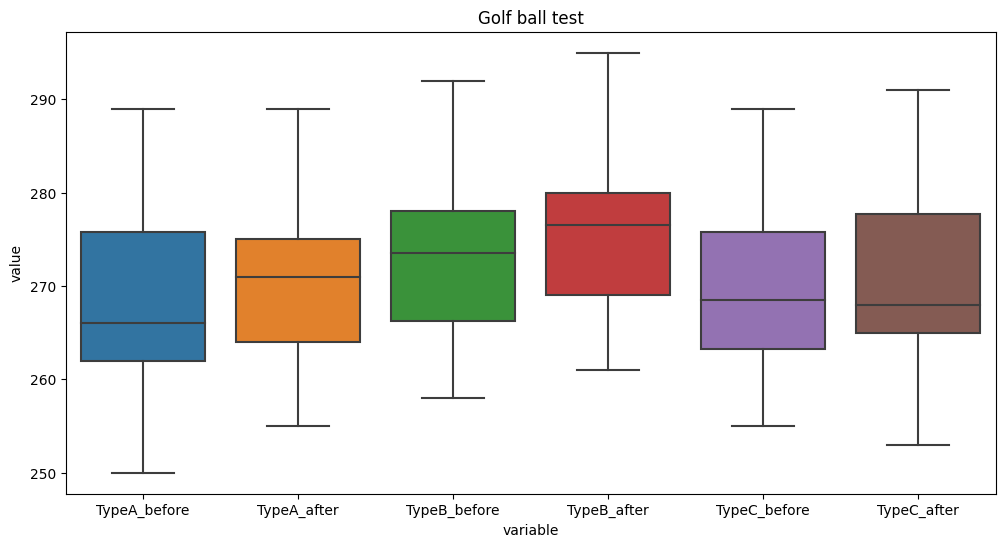

In [37]:
# 그룹 별 박스 플롯 시각화

df2 =  pd.melt(df)
plt.figure(figsize=(12,6))
sns.boxplot(x='variable', y='value', data=df2)
plt.title('Golf ball test')
plt.show()

In [38]:
# 데이터 정규성 검정 Shapiro-Wilk Test

print(shapiro(df['TypeA_before']))
print(shapiro(df['TypeA_after']))
print(shapiro(df['TypeB_before']))
print(shapiro(df['TypeB_after']))
print(shapiro(df['TypeC_before']))
print(shapiro(df['TypeC_after']))

ShapiroResult(statistic=0.9655377864837646, pvalue=0.15155059099197388)
ShapiroResult(statistic=0.9728279113769531, pvalue=0.3005082309246063)
ShapiroResult(statistic=0.9730042219161987, pvalue=0.30535760521888733)
ShapiroResult(statistic=0.9693011045455933, pvalue=0.21675525605678558)
ShapiroResult(statistic=0.9595518112182617, pvalue=0.08513058722019196)
ShapiroResult(statistic=0.9469832181930542, pvalue=0.02568192593753338)


*p-value가 0.05을 넘으면 정규성을 가짐 -> outlier 처리나 scaling으로 정규성을 갖도록 가공해야함*

In [39]:
# 데이터 등분산성 검정 bartlett
stats.bartlett(df['TypeA_before'],df['TypeA_after'],
               df['TypeB_before'],df['TypeB_after'],
               df['TypeC_before'],df['TypeC_after'])

BartlettResult(statistic=2.232358764161634, pvalue=0.8161484218330712)

*p-value가 0.05 이상이므로 등분산임*

In [40]:
# Z-test (TypeA_Before와 TypeA_After)
ztest(df['TypeA_before'], x2=df['TypeA_after'], value=0, alternative='two-sided') # 양측검정

(-1.2313987682249838, 0.21817375744980994)

p-value가 0.218로 평균차이가 유의미하지 않음을 나타냄. 즉 TypeA 골프공은 특정 처리를 하기 전과 후의 비거리가 통게적으로 차이가 없음

In [41]:
# Z-test (TypeA_Before와 TypeB_before)

# 양측검정
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='two-sided'))
## p-value가 0.05 이하로 두 집단 간 유의미한 차이가 있음

# 단측검정(왼꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='smaller'))
## p-value가 0.05 이하로 TypeA_before가 TypeB_before보다 값이 작은가에 대한 검정 결과가 유의미함

# 단측검정(오른꼬리검정)
print(ztest(df['TypeA_before'], x2=df['TypeB_before'], value=0, alternative='larger'))
## p-value가 0.05 이상으로 TypeA_before가 TypeB_before보다 값이 큰가에 대한 검정 결과가 유의미하지 않음

(-2.789495974658115, 0.005279015267745852)
(-2.789495974658115, 0.002639507633872926)
(-2.789495974658115, 0.9973604923661271)


In [42]:
# 대응표본 t검정 수행
scipy.stats.ttest_rel(df['TypeA_before'],df['TypeA_after'])

TtestResult(statistic=-1.221439914972903, pvalue=0.22776376448687602, df=49)

TypeA 골프공의 특정 처리 전과 후 평균 값 차이에 대한 T-test 결과 p-value가 0.05 이상으로 z-test와 마찬가지로 유의미하지 않은 것으로 나타남

In [43]:
# 독립표본 t검정 수행
ttest_ind(df['TypeA_before'],df['TypeB_before'], equal_var=False)

TtestResult(statistic=-2.789495974658115, pvalue=0.0063642243501398285, df=96.23536968302767)

*`equal_var = False`로 TypeA 골프공과 TypeB 골프공의 평균 차이 T-test를 수행함  
p-value는 0.05 이상으로 둘 간의 평균 차이가 통계적으로 유의미한 것으로 나타남*

### ANOVA

In [44]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import scipy.stats
import scipy.stats as stats
from scipy.stats import ttest_ind
import pandas as pd

In [45]:
# stats 패키지 아노바 검정

F_statistic, pVal = stats.f_oneway(df['TypeA_before'], 
                                   df['TypeB_before'], 
                                   df['TypeC_before'])

print('일원분산분석 결과 : F={0:.1f}, p={1:.5f}'.format(F_statistic, pVal))

일원분산분석 결과 : F=4.2, p=0.01652


p-value가 0.016이므로 3개 변수 중 최소한 하나의 변수 조합 간에는 차이가 있음을 알 수 있다.

In [46]:
# 데이터 재구조화

df2 =  pd.melt(df)
df2 = df2[df2['variable'].isin(['TypeA_before', 'TypeB_before', 'TypeC_before'])]

df2.head()

,variable,value
0,TypeA_before,277
1,TypeA_before,269
2,TypeA_before,263
3,TypeA_before,266
4,TypeA_before,262


In [47]:
# ols 패키지 아노바 검정

model = ols('value ~ C(variable)', df2).fit()
print(anova_lm(model))

                df        sum_sq     mean_sq         F    PR(>F)
C(variable)    2.0    675.453333  337.726667  4.220169  0.016515
Residual     147.0  11763.940000   80.026803       NaN       NaN


      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
TypeA_before TypeB_before     5.14 0.0129  0.9038 9.3762   True
TypeA_before TypeC_before      1.9 0.5392 -2.3362 6.1362  False
TypeB_before TypeC_before    -3.24 0.1696 -7.4762 0.9962  False
---------------------------------------------------------------


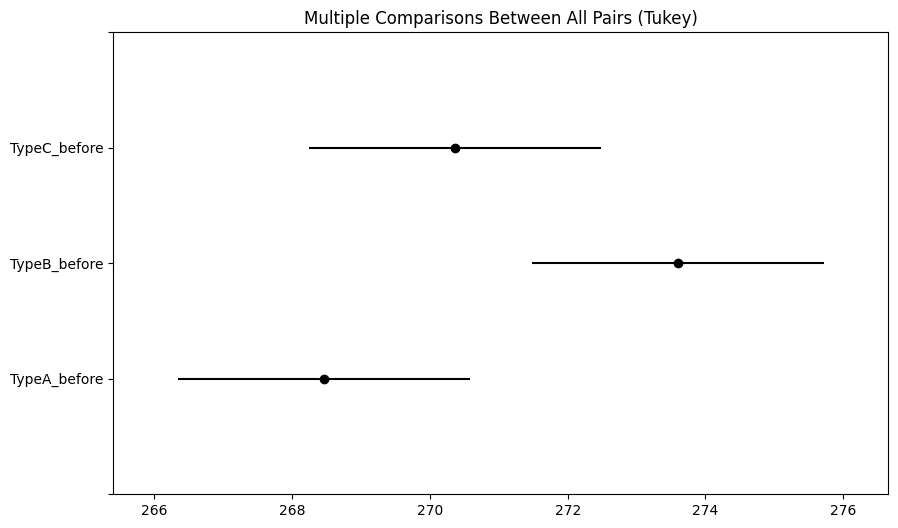

In [48]:
# 사후검정

posthoc = pairwise_tukeyhsd(df2['value'], 
                            df2['variable'], 
                            alpha=0.05)
print(posthoc)
fig = posthoc.plot_simultaneous()

*TypeA_before와 TypeB_before 간에만 유의미한 차이가 있는 것으로 나타남*